In [58]:
import plotly.io as pio
pio.renderers.default = "browser"


In [2]:
import pandas as pd

# Load the dataset
file_path = 'pollution_2000_2023.csv'
data = pd.read_csv(file_path)
# Display basic information about the dataset
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum(),
    "Data Types": data.dtypes
}

data_info


{'Shape': (665414, 22),
 'Columns': ['Unnamed: 0',
  'Date',
  'Address',
  'State',
  'County',
  'City',
  'O3 Mean',
  'O3 1st Max Value',
  'O3 1st Max Hour',
  'O3 AQI',
  'CO Mean',
  'CO 1st Max Value',
  'CO 1st Max Hour',
  'CO AQI',
  'SO2 Mean',
  'SO2 1st Max Value',
  'SO2 1st Max Hour',
  'SO2 AQI',
  'NO2 Mean',
  'NO2 1st Max Value',
  'NO2 1st Max Hour',
  'NO2 AQI'],
 'Missing Values': Unnamed: 0           0
 Date                 0
 Address              0
 State                0
 County               0
 City                 0
 O3 Mean              0
 O3 1st Max Value     0
 O3 1st Max Hour      0
 O3 AQI               0
 CO Mean              0
 CO 1st Max Value     0
 CO 1st Max Hour      0
 CO AQI               0
 SO2 Mean             0
 SO2 1st Max Value    0
 SO2 1st Max Hour     0
 SO2 AQI              0
 NO2 Mean             0
 NO2 1st Max Value    0
 NO2 1st Max Hour     0
 NO2 AQI              0
 dtype: int64,
 'Data Types': Unnamed: 0             int64
 Date  

In [3]:
# Step 1: Drop the unnecessary 'Unnamed: 0' column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Step 2: Convert 'Date' to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Step 3: Check and remove duplicates
initial_row_count = data_cleaned.shape[0]
data_cleaned = data_cleaned.drop_duplicates()
duplicates_removed = initial_row_count - data_cleaned.shape[0]

# Step 4: Describe numerical columns to identify potential outliers
numerical_summary = data_cleaned.describe()

# Output the results
{
    "Duplicates Removed": duplicates_removed,
    "Numerical Summary": numerical_summary
}


{'Duplicates Removed': 1739,
 'Numerical Summary':                                 Date        O3 Mean  O3 1st Max Value  \
 count                         663675  663675.000000     663675.000000   
 mean   2012-06-18 06:40:29.139564032       0.028605          0.038988   
 min              2000-01-01 00:00:00      -0.000706          0.000000   
 25%              2007-02-17 00:00:00       0.019824          0.029000   
 50%              2012-11-17 00:00:00       0.028353          0.038000   
 75%              2018-02-07 00:00:00       0.036882          0.048000   
 max              2023-09-30 00:00:00       0.107353          0.140000   
 std                              NaN       0.012157          0.014917   
 
        O3 1st Max Hour         O3 AQI        CO Mean  CO 1st Max Value  \
 count    663675.000000  663675.000000  663675.000000     663675.000000   
 mean         10.766949      39.149429       0.329788          0.466171   
 min           7.000000       0.000000      -0.437500    

In [4]:
# Step 1: Replace negative values with NaN (non-physical values)
numerical_columns = [
    'O3 Mean', 'O3 1st Max Value', 'CO Mean', 'CO 1st Max Value',
    'SO2 Mean', 'SO2 1st Max Value', 'NO2 Mean', 'NO2 1st Max Value'
]
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].applymap(
    lambda x: x if x >= 0 else None
)

# Step 2: Cap extreme outliers using the 99th percentile
for col in numerical_columns:
    upper_cap = data_cleaned[col].quantile(0.99)
    data_cleaned[col] = data_cleaned[col].clip(upper=upper_cap)

# Step 3: Recalculate summary statistics to verify changes
cleaned_summary = data_cleaned.describe()

cleaned_summary


/var/folders/10/sz2t1v6s6sd31748fvxdtzs00000gn/T/ipykernel_79592/1004899457.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned[numerical_columns] = data_cleaned[numerical_columns].applymap(


Date        O3 Mean  O3 1st Max Value  \
count                         663675  663673.000000     663675.000000   
mean   2012-06-18 06:40:29.139564032       0.028552          0.038899   
min              2000-01-01 00:00:00       0.000000          0.000000   
25%              2007-02-17 00:00:00       0.019824          0.029000   
50%              2012-11-17 00:00:00       0.028353          0.038000   
75%              2018-02-07 00:00:00       0.036882          0.048000   
max              2023-09-30 00:00:00       0.058118          0.079000   
std                              NaN       0.012005          0.014625   

       O3 1st Max Hour         O3 AQI        CO Mean  CO 1st Max Value  \
count    663675.000000  663675.000000  661736.000000     662726.000000   
mean         10.766949      39.149429       0.326732          0.459680   
min           7.000000       0.000000       0.000000          0.000000   
25%           9.000000      27.000000       0.179167          0.200000   
50%          10.000000      35.000000       0.258333          0.300000   
75%          11.000000      44.000000       0.412500          0.600000   
max          23.000000     237.000000       1.370833          2.200000   
std           3.296334      22.265966       0.249719          0.385799   

       CO 1st Max Hour         CO AQI       SO2 Mean  SO2 1st Max Value  \
count    663675.000000  663675.000000  646303.000000      658913.000000   
mean          5.929563       5.254192       1.432077           3.786787   
min           0.000000       0.000000       0.000000           0.000000   
25%           0.000000       2.000000       0.200000           0.600000   
50%           1.000000       3.000000       0.636364           1.400000   
75%           9.000000       7.000000       1.666667           4.000000   
max          23.000000     201.000000      11.791667          37.000000   
std           7.720752       5.014410       2.118147           6.242061   

       SO2 1st Max Hour        SO2 AQI       NO2 Mean  NO2 1st Max Value  \
count     663675.000000  663675.000000  662748.000000      663510.000000   
mean           8.865193       5.165726      11.470410          23.146106   
min            0.000000       0.000000       0.000000           0.000000   
25%            3.000000       0.000000       4.876190          11.000000   
50%            8.000000       1.000000       9.333333          21.000000   
75%           13.000000       6.000000      16.000000          33.000000   
max           23.000000     200.000000      40.304348          65.000000   
std            6.775667      10.381727       8.666645          14.704091   

       NO2 1st Max Hour        NO2 AQI  
count     663675.000000  663675.000000  
mean          11.588333      21.787970  
min            0.000000       0.000000  
25%            5.000000      10.000000  
50%            9.000000      20.000000  
75%           20.000000      31.000000  
max           23.000000     153.000000  
std            7.888289      14.453261

In [5]:
# Step 1: Interpolate missing values for numerical columns
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].interpolate(method='linear', limit_direction='forward')

# Step 2: Fill any remaining NaNs with column means
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].fillna(data_cleaned[numerical_columns].mean())

# Verify there are no remaining missing values in numerical columns
missing_after_imputation = data_cleaned[numerical_columns].isnull().sum()

missing_after_imputation


O3 Mean              0
O3 1st Max Value     0
CO Mean              0
CO 1st Max Value     0
SO2 Mean             0
SO2 1st Max Value    0
NO2 Mean             0
NO2 1st Max Value    0
dtype: int64

In [6]:
# Step 1: Add lag features for pollutants (1-day lag)
for col in numerical_columns:
    data_cleaned[f"{col}_lag1"] = data_cleaned[col].shift(1)

# Step 2: Add pollutant ratios as derived features
data_cleaned['PM25_to_PM10_ratio'] = data_cleaned['O3 Mean'] / (data_cleaned['NO2 Mean'] + 1e-6)  # Avoid division by zero
data_cleaned['CO_to_SO2_ratio'] = data_cleaned['CO Mean'] / (data_cleaned['SO2 Mean'] + 1e-6)

# Step 3: Drop rows with NaNs introduced by lagging
data_cleaned = data_cleaned.dropna()

# Verify the newly created features
engineered_features_summary = data_cleaned[['O3 Mean_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio']].describe()

engineered_features_summary


O3 Mean_lag1  PM25_to_PM10_ratio  CO_to_SO2_ratio
count  663674.000000       663674.000000     6.636740e+05
mean        0.028552          173.245595     1.661055e+04
std         0.012005         2530.786554     8.030019e+04
min         0.000000            0.000000     0.000000e+00
25%         0.019824            0.001473     1.730516e-01
50%         0.028353            0.003167     4.272064e-01
75%         0.036882            0.006545     1.245569e+00
max         0.058118        58118.000000     1.370833e+06

In [7]:
import pandas as pd

# Filter data for NYC
nyc_data = data_cleaned[data_cleaned['City'] == 'New York']

# Check for non-unique dates
if nyc_data['Date'].duplicated().any():
    # Group by date and calculate the mean for specified features
    nyc_data = (
        nyc_data.groupby('Date', as_index=False)
        .agg({
            'O3 Mean': 'mean',
            'CO Mean': 'mean',
            'SO2 Mean': 'mean',
            'NO2 Mean': 'mean',
        })
    )
#extend with col "Address" that is just "NYC Average"
nyc_data['Address'] = 'NYC Average'
# Split data into training, validation, and testing sets
training_data = nyc_data[nyc_data['Date'] < '2019-01-01']
validation_data = nyc_data[(nyc_data['Date'] >= '2019-01-01') & (nyc_data['Date'] < '2021-01-01')]
testing_data = nyc_data[nyc_data['Date'] >= '2021-01-01']

# Define features and target
features = [
    'O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean',
]
target = 'O3_Mean_Change'

# Ensure no non-unique values remain
assert nyc_data['Date'].duplicated().sum() == 0, "There are still non-unique dates in the dataset."
nyc_data

Date   O3 Mean   CO Mean   SO2 Mean   NO2 Mean      Address
0    2000-01-01  0.001941  0.652632  11.791667  28.041667  NYC Average
1    2000-01-02  0.009588  0.833333  11.791667  35.375000  NYC Average
2    2000-01-03  0.004235  0.383333   9.958333  32.875000  NYC Average
3    2000-01-04  0.009588  0.150000   3.541667  22.125000  NYC Average
4    2000-01-05  0.016706  0.050000   3.291667  15.958333  NYC Average
...         ...       ...       ...        ...        ...          ...
8630 2023-08-27  0.035353  0.262500   0.125000   4.379167  NYC Average
8631 2023-08-28  0.026118  0.262500   0.104167   4.910526  NYC Average
8632 2023-08-29  0.026176  0.225000   0.100000   5.962500  NYC Average
8633 2023-08-30  0.036000  0.229167   0.112500   7.512500  NYC Average
8634 2023-08-31  0.031083  0.200000   0.177273   4.000000  NYC Average

[8635 rows x 6 columns]

In [8]:
def categorize_changes_in_mean(x):
    if x <= -0.30:
        return "(-inf,-30%]"
    elif x <= -0.20:
        return "(-30%,-20%]"
    elif x <= -0.10:
        return "(-20%,-10%]"
    elif x <= -0.0:
        return "(10%,0%]"
    elif x <= 0.10:
        return "(0%,10%]"
    elif x <= 0.20:
        return "(10%,20%]"
    elif x <= 0.30:
        return "(20%,30%]"
    else:
        return "(30%,inf]"

def featurize_time_series(df, col_name, lag_freq, num_trailing_periods, reduce_rows=True,categorize_changes=True):
    '''
    Function to create lagged features for a time series dataset
    df: Input DataFrame
    col_name: Name of the column to be lagged
    lag_freq: Frequency of the lag (e.g., '1w' for 1 week, '1m' for 1 month)
    num_trailing_periods: Number of trailing periods to be created
    reduce_rows: Whether to reduce rows by grouping based on the lag frequency

    '''
    CONTROL_FOR_COLUMN = 'Address' #might wanna make this []

    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values([CONTROL_FOR_COLUMN, 'Date'])

    # Create a new dataframe with only the required columns
    new_df = df[[CONTROL_FOR_COLUMN, 'Date', col_name]].copy()
    new_df = new_df.rename(columns={col_name: f'{col_name}_t'})
    if reduce_rows:
        if lag_freq == '1w':
            new_df = new_df.groupby([CONTROL_FOR_COLUMN, pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()
        elif lag_freq == '1m':
            new_df = new_df.groupby([CONTROL_FOR_COLUMN, pd.Grouper(key='Date', freq='MS')]).first().reset_index()
        elif lag_freq == '1q':
            new_df = new_df.groupby([CONTROL_FOR_COLUMN, pd.Grouper(key='Date', freq='QS')]).first().reset_index()
        elif lag_freq == '1y':
            new_df = new_df.groupby([CONTROL_FOR_COLUMN, pd.Grouper(key='Date', freq='AS')]).first().reset_index()
    #create lagged features 
    for i in range(1, num_trailing_periods + 1):
        new_df[f'{col_name}_t_minus_{i}'] = new_df.groupby(CONTROL_FOR_COLUMN)[f'{col_name}_t'].shift(i)
    if categorize_changes:
        #replace _t with _change by comparing to _t_minus_1
        new_df[f'{col_name}_change'] = new_df[f'{col_name}_t'] / new_df[f'{col_name}_t_minus_1'] - 1
        new_df[f'{col_name}_change_category'] = new_df[f'{col_name}_change'].apply(categorize_changes_in_mean)
        #rename change category to _t_change
        new_df = new_df.drop(columns=[f'{col_name}_change'])
        new_df = new_df.drop(columns=[f'{col_name}_t'])
        new_df = new_df.rename(columns={f'{col_name}_change_category': f'{col_name}_t_change'})

    new_df = new_df.dropna() #insufficient trailing periods
    return new_df    

FEATURIZATION_LAG_FREQ = '1d'
NUM_PERIODS = 14

featurized_dfs = {  }
for feature in features:
    featurized_dfs[feature] = featurize_time_series(nyc_data, feature, FEATURIZATION_LAG_FREQ, NUM_PERIODS)
#inner join all tables in featurized_dfs' values. Shared cols are Address and Date
featurized_data = featurized_dfs[features[0]]
for feature in features[1:]:
    featurized_data = featurized_data.merge(featurized_dfs[feature], on=['Address', 'Date'])
target_col_names = [f'{feature}_t_change' for feature in features]
feature_col_names = [col for col in featurized_data.columns if col not in ['Address', 'Date'] + target_col_names]
#rearrange so the Address, Date, and target col names are upfront but do not lose any cols
featurized_data = featurized_data[['Address', 'Date'] + target_col_names + [col for col in featurized_data.columns if col not in ['Address', 'Date'] + target_col_names]]
featurized_data

Address       Date O3 Mean_t_change CO Mean_t_change  \
0     NYC Average 2000-01-15      (-inf,-30%]        (30%,inf]   
1     NYC Average 2000-01-16        (30%,inf]         (0%,10%]   
2     NYC Average 2000-01-17         (0%,10%]      (-inf,-30%]   
3     NYC Average 2000-01-18      (-inf,-30%]         (0%,10%]   
4     NYC Average 2000-01-19         (10%,0%]        (30%,inf]   
...           ...        ...              ...              ...   
8616  NYC Average 2023-08-27        (10%,20%]      (-30%,-20%]   
8617  NYC Average 2023-08-28      (-30%,-20%]         (10%,0%]   
8618  NYC Average 2023-08-29         (0%,10%]      (-20%,-10%]   
8619  NYC Average 2023-08-30        (30%,inf]         (0%,10%]   
8620  NYC Average 2023-08-31      (-20%,-10%]      (-20%,-10%]   

     SO2 Mean_t_change NO2 Mean_t_change  O3 Mean_t_minus_1  \
0            (30%,inf]         (30%,inf]           0.022588   
1          (-inf,-30%]       (-inf,-30%]           0.008118   
2          (-inf,-30%]       (-30%,-20%]           0.020294   
3            (30%,inf]         (30%,inf]           0.021529   
4             (10%,0%]         (30%,inf]           0.008353   
...                ...               ...                ...   
8616       (-20%,-10%]       (-inf,-30%]           0.032118   
8617       (-20%,-10%]         (10%,20%]           0.035353   
8618          (10%,0%]         (20%,30%]           0.026118   
8619         (10%,20%]         (20%,30%]           0.026176   
8620         (30%,inf]       (-inf,-30%]           0.036000   

      O3 Mean_t_minus_2  O3 Mean_t_minus_3  O3 Mean_t_minus_4  ...  \
0              0.017353           0.002300           0.010412  ...   
1              0.022588           0.017353           0.002300  ...   
2              0.008118           0.022588           0.017353  ...   
3              0.020294           0.008118           0.022588  ...   
4              0.021529           0.020294           0.008118  ...   
...                 ...                ...                ...  ...   
8616           0.019824           0.029176           0.035118  ...   
8617           0.032118           0.019824           0.029176  ...   
8618           0.035353           0.032118           0.019824  ...   
8619           0.026118           0.035353           0.032118  ...   
8620           0.026176           0.026118           0.035353  ...   

      NO2 Mean_t_minus_5  NO2 Mean_t_minus_6  NO2 Mean_t_minus_7  \
0              28.250000           33.375000           25.500000   
1              28.333333           28.250000           33.375000   
2              23.909091           28.333333           28.250000   
3              22.208333           23.909091           28.333333   
4              13.958333           22.208333           23.909091   
...                  ...                 ...                 ...   
8616            4.200000           14.508333           13.716667   
8617            4.308333            4.200000           14.508333   
8618            6.345455            4.308333            4.200000   
8619            7.883333            6.345455            4.308333   
8620           12.179167            7.883333            6.345455   

      NO2 Mean_t_minus_8  NO2 Mean_t_minus_9  NO2 Mean_t_minus_10  \
0              34.458333           31.125000            15.958333   
1              25.500000           34.458333            31.125000   
2              33.375000           25.500000            34.458333   
3              28.250000           33.375000            25.500000   
4              28.333333           28.250000            33.375000   
...                  ...                 ...                  ...   
8616            4.816667            5.354167             4.129167   
8617           13.716667            4.816667             5.354167   
8618           14.508333           13.716667             4.816667   
8619            4.200000           14.508333            13.716667   
8620            4.308333            4.20000

In [9]:
#group O3_Mean_t_change by category to see how diverse the labels are 
featurized_data['O3 Mean_t_change'].value_counts(normalize=True)

O3 Mean_t_change
(30%,inf]      0.266558
(-inf,-30%]    0.214592
(10%,0%]       0.103352
(-20%,-10%]    0.103236
(-30%,-20%]    0.090129
(0%,10%]       0.088157
(10%,20%]      0.074469
(20%,30%]      0.059506
Name: proportion, dtype: float64

### The following target columns must be predicted using the below feature columns. 

In [10]:
print("Feature columns to use for training:", feature_col_names)
print("Target columns to predict:", target_col_names)

Feature columns to use for training: ['O3 Mean_t_minus_1', 'O3 Mean_t_minus_2', 'O3 Mean_t_minus_3', 'O3 Mean_t_minus_4', 'O3 Mean_t_minus_5', 'O3 Mean_t_minus_6', 'O3 Mean_t_minus_7', 'O3 Mean_t_minus_8', 'O3 Mean_t_minus_9', 'O3 Mean_t_minus_10', 'O3 Mean_t_minus_11', 'O3 Mean_t_minus_12', 'O3 Mean_t_minus_13', 'O3 Mean_t_minus_14', 'CO Mean_t_minus_1', 'CO Mean_t_minus_2', 'CO Mean_t_minus_3', 'CO Mean_t_minus_4', 'CO Mean_t_minus_5', 'CO Mean_t_minus_6', 'CO Mean_t_minus_7', 'CO Mean_t_minus_8', 'CO Mean_t_minus_9', 'CO Mean_t_minus_10', 'CO Mean_t_minus_11', 'CO Mean_t_minus_12', 'CO Mean_t_minus_13', 'CO Mean_t_minus_14', 'SO2 Mean_t_minus_1', 'SO2 Mean_t_minus_2', 'SO2 Mean_t_minus_3', 'SO2 Mean_t_minus_4', 'SO2 Mean_t_minus_5', 'SO2 Mean_t_minus_6', 'SO2 Mean_t_minus_7', 'SO2 Mean_t_minus_8', 'SO2 Mean_t_minus_9', 'SO2 Mean_t_minus_10', 'SO2 Mean_t_minus_11', 'SO2 Mean_t_minus_12', 'SO2 Mean_t_minus_13', 'SO2 Mean_t_minus_14', 'NO2 Mean_t_minus_1', 'NO2 Mean_t_minus_2', 'NO2 Me

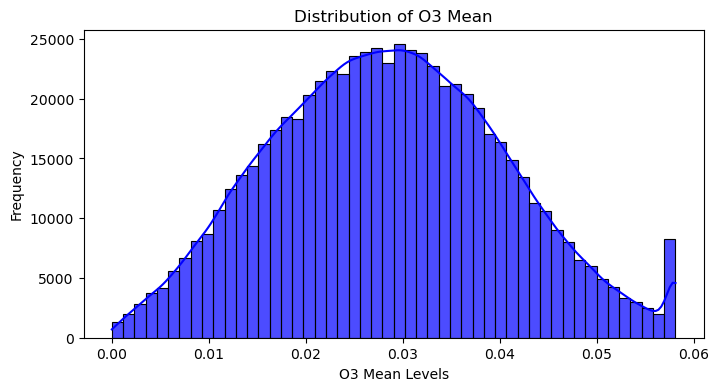

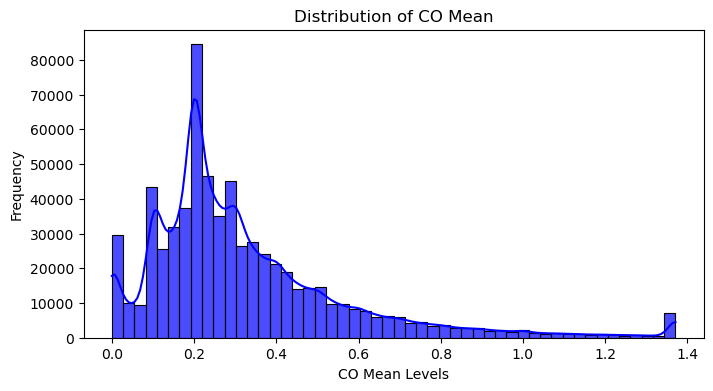

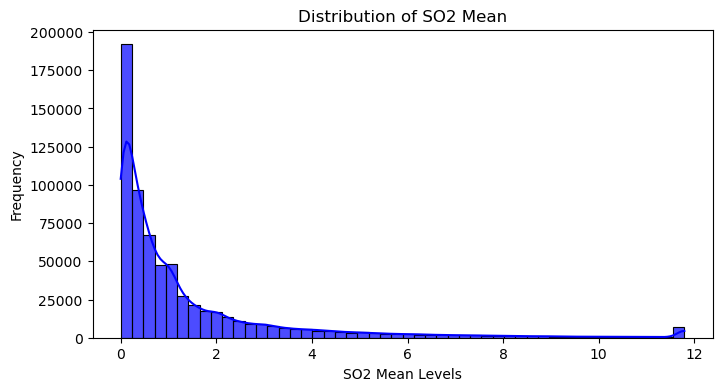

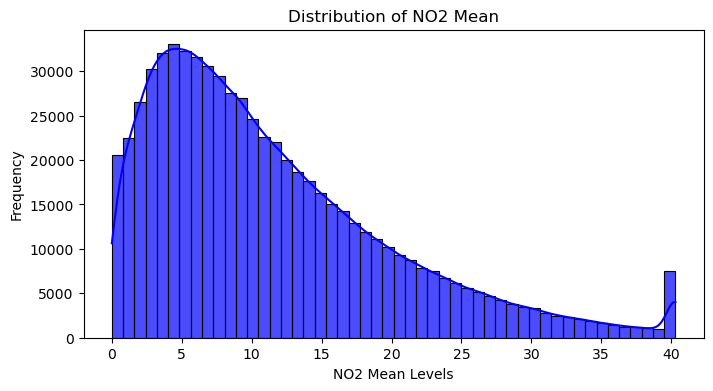

NameError: name 'numerical_features' is not defined

<Figure size 1200x800 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Exploratory Data Analysis (EDA)

# Visualize the distribution of key pollutants
pollutants = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
#@AASHISH EXPOSE COLS FOR PLOTTING
for pollutant in pollutants:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_cleaned[pollutant], bins=50, kde=True, color="blue", alpha=0.7)
    plt.title(f"Distribution of {pollutant}")
    plt.xlabel(f"{pollutant} Levels")
    plt.ylabel("Frequency")
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data_cleaned[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to plot performance vs. hyperparameter values
def plot_hyperparameter_performance(grid_search, model_name, target_name):
    results = pd.DataFrame(grid_search.cv_results_)
    param_columns = [col for col in results.columns if col.startswith("param_")]

    for param in param_columns:
        plt.figure(figsize=(8, 6))
        param_values = results[param]
        if not np.issubdtype(param_values.dtype, np.number):
            param_values = param_values.astype(str)
        plt.scatter(
            param_values,
            results["mean_test_score"],
            marker="o",
            label="Mean Test Score",
        )
        plt.title(f"{model_name} for {target_name}: Performance vs {param}")
        plt.xlabel(param)
        plt.ylabel("Accuracy")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Model configuration
param_grids = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, class_weight="balanced"),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5, 10],
        },
    },
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=10000),
        "param_grid": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs", "saga"],
        },
    },
    "MLP": {
        "model": MLPClassifier(random_state=42, max_iter=10000),
        "param_grid": {
            "hidden_layer_sizes": [(50,), (100,), (100, 50)],
            "activation": ["relu", "tanh"],
            "alpha": [0.001, 0.01],
        },
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
        },
    },
}

# Splitting featurized_data into training, validation, and testing datasets
training_data = featurized_data[featurized_data["Date"] < "2019-01-01"]
validation_data = featurized_data[
    (featurized_data["Date"] >= "2019-01-01") & (featurized_data["Date"] < "2021-01-01")
]
testing_data = featurized_data[featurized_data["Date"] >= "2021-01-01"]

# Separate features and targets
X_train = training_data[feature_col_names]
X_val = validation_data[feature_col_names]
X_test = testing_data[feature_col_names]

results = {}

# Train and tune models for each target
for target in target_col_names:
    print(f"\nTraining models for target: {target}")

    # Extract target-specific data
    y_train = training_data[target]
    y_val = validation_data[target]
    y_test = testing_data[target]

    results[target] = {}

    for model_name, config in param_grids.items():
        print(f"Tuning {model_name} for target {target}...")

        grid_search = GridSearchCV(
            estimator=config["model"],
            param_grid=config["param_grid"],
            scoring="accuracy",
            cv=3,
        )
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        results[target][model_name] = {
            "best_model": best_model,
            "best_params": grid_search.best_params_,
            "best_score": grid_search.best_score_,
        }

        print(f"Best parameters for {model_name} on {target}: {grid_search.best_params_}")
        print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

        # Evaluate on the training set
        y_train_pred = best_model.predict(X_train)
        print("\nTraining Performance:")
        print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
        print(f"Training F1 Score: {f1_score(y_train, y_train_pred, average='weighted'):.2f}")
        print(classification_report(y_train, y_train_pred))

        # Evaluate on the validation set
        y_val_pred = best_model.predict(X_val)
        print("\nValidation Performance:")
        print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")
        print(f"Validation F1 Score: {f1_score(y_val, y_val_pred, average='weighted'):.2f}")
        print(classification_report(y_val, y_val_pred))

        # Plot performance vs. hyperparameters
        plot_hyperparameter_performance(grid_search, model_name, target)

# Testing the best model for each target
for target, model_results in results.items():
    print(f"\nTesting best models for target: {target}")
    for model_name, model_info in model_results.items():
        best_model = model_info["best_model"]
        y_test_pred = best_model.predict(X_test)
        print(f"\nModel: {model_name}")
        print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
        print(f"Test F1 Score: {f1_score(y_test, y_test_pred, average='weighted'):.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_test_pred))



Training models for target: O3 Mean_t_change
Tuning Random Forest for target O3 Mean_t_change...


In [16]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Evaluate the best model for each target
for target in target_col_names:
    print(f"\nEvaluating the best model for target: {target}")
    
    # Retrieve the best model for the current target based on validation accuracy
    best_model_name = max(
        results[target],
        key=lambda name: results[target][name]["best_score"]
    )
    best_model_info = results[target][best_model_name]
    best_model = best_model_info["best_model"]

    # Print the best model details
    print(f"The best model for target {target} is: {best_model_name}")
    print(f"Best parameters: {best_model_info['best_params']}")
    print(f"Validation Accuracy: {best_model_info['best_score']:.2f}\n")

    # Evaluate the best model on the test set
    y_test = testing_data[target]
    y_pred_test = best_model.predict(X_test)

    print(f"{best_model_name} (Tuned) Testing Evaluation for target {target}:")
    print(f"  Testing Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
    print(f"  Testing F1 Score: {f1_score(y_test, y_pred_test, average='weighted'):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))


NameError: name 'best_models' is not defined

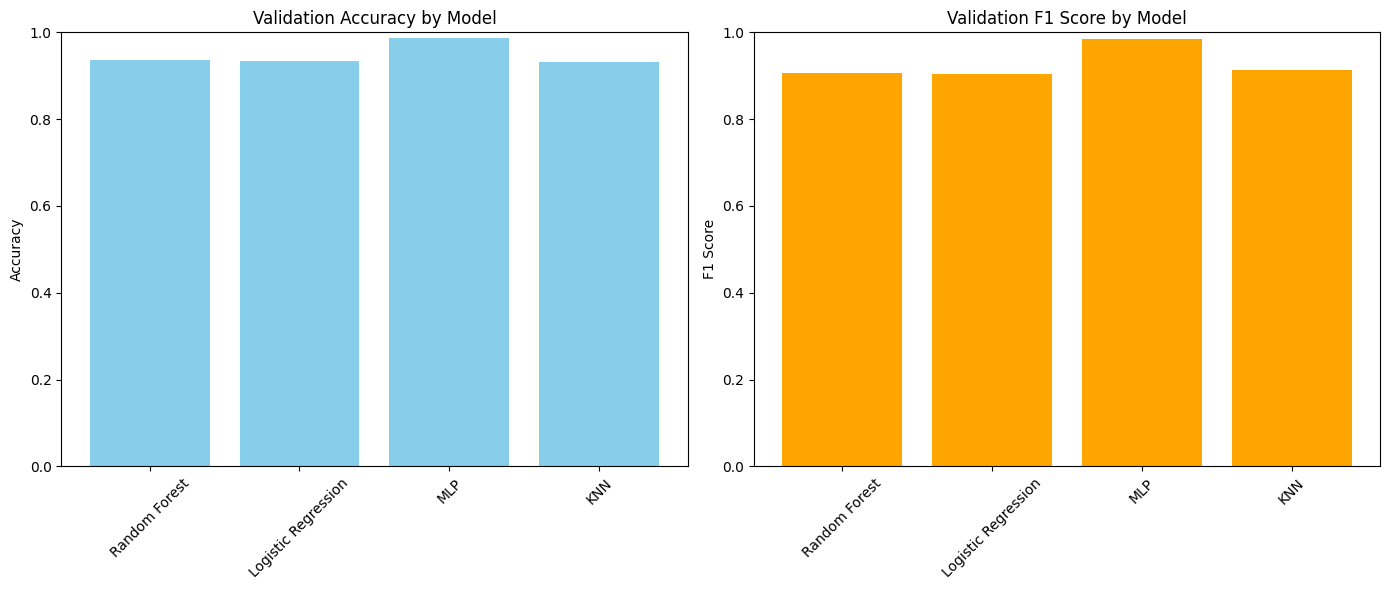

In [ ]:
import matplotlib.pyplot as plt

# Iterate over targets to visualize performance
for target in target_col_names:
    print(f"\nVisualizing performance for target: {target}")
    
    # Extract data for the current target
    model_names = list(results[target].keys())
    accuracies = [
        accuracy_score(y_val, model_info["best_model"].predict(X_val))
        for model_info in results[target].values()
    ]
    f1_scores = [
        f1_score(y_val, model_info["best_model"].predict(X_val), average="weighted")
        for model_info in results[target].values()
    ]
    
    # Plot Accuracy and F1 Score
    plt.figure(figsize=(14, 6))

    # Accuracy Bar Chart
    plt.subplot(1, 2, 1)
    plt.bar(model_names, accuracies, color="skyblue")
    plt.title(f"Validation Accuracy by Model for {target}")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)

    # F1 Score Bar Chart
    plt.subplot(1, 2, 2)
    plt.bar(model_names, f1_scores, color="orange")
    plt.title(f"Validation F1 Score by Model for {target}")
    plt.ylabel("F1 Score")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

# Iterate over targets and collect metrics
for target in target_col_names:
    print(f"\nCollecting metrics for target: {target}")
    
    summary_data = []
    for model_name, info in results[target].items():
        model = info["best_model"]
        y_pred_val = model.predict(X_val)
        summary_data.append({
            "Model": model_name,
            "Accuracy": accuracy_score(y_val, y_pred_val),
            "F1 Score": f1_score(y_val, y_pred_val, average="weighted"),
            "Best Parameters": info["best_params"]
        })
    
    # Create a summary DataFrame for the current target
    summary_df = pd.DataFrame(summary_data)
    
    # Display the summary table
    print(f"\nSummary for target: {target}")
    print(summary_df)


                 Model  Accuracy  F1 Score  \
0        Random Forest  0.935531  0.905388   
1  Logistic Regression  0.934799  0.903296   
2                  MLP  0.986081  0.984979   
3                  KNN  0.932601  0.912253   

                                     Best Parameters  
0  {'max_depth': None, 'min_samples_split': 2, 'n...  
1    {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}  
2  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...  
3          {'n_neighbors': 7, 'weights': 'distance'}  


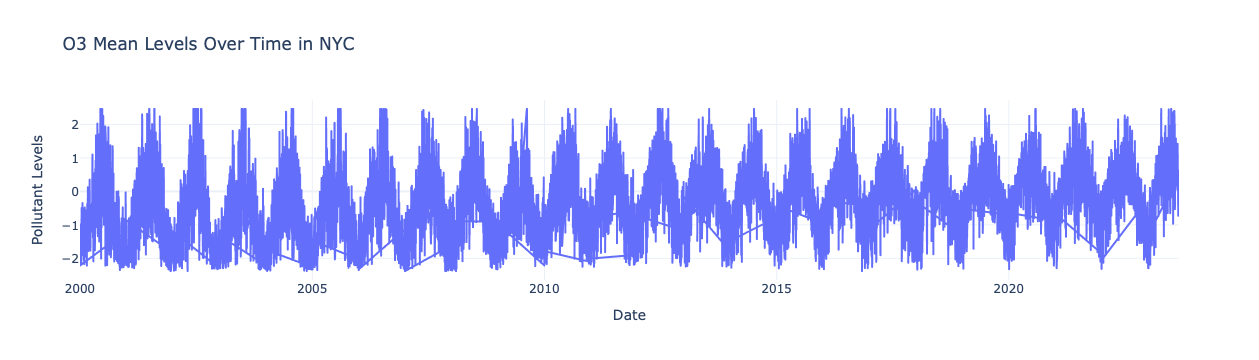

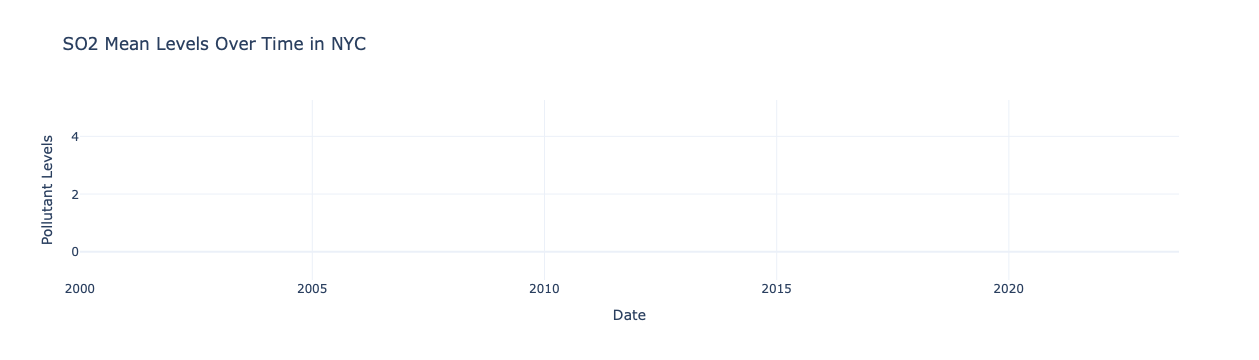

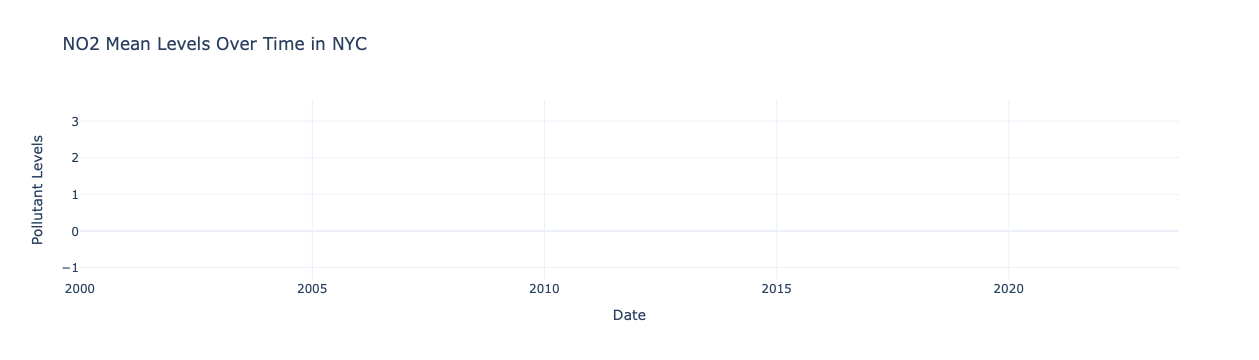

In [ ]:
import plotly.express as px
import plotly.io as pio

# Ensure the correct renderer is set for JupyterLab
pio.renderers.default = "jupyterlab"

# List of features to plot (e.g., pollutant levels or other target columns)
features_to_plot = target_col_names  # Replace with any list of columns to plot

# Plot trends over time for each feature
for feature in features_to_plot:
    fig = px.line(
        featurized_data,  # Replace with the appropriate DataFrame
        x="Date",
        y=feature,
        title=f"{feature} Trends Over Time",
        labels={"Date": "Date", feature: "Value"}
    )
    fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Value",
        template="plotly_white"
    )
    fig.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Access the best-tuned Random Forest model
rf_model = best_models["Random Forest"]["model"]

# Aggregate feature importance across all classes
feature_importances = np.mean([
    estimator.feature_importances_ for estimator in rf_model.estimators_
], axis=0)

# Use the feature names from the training data
actual_features = X_train.columns.tolist()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': actual_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest - OneVsRest)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


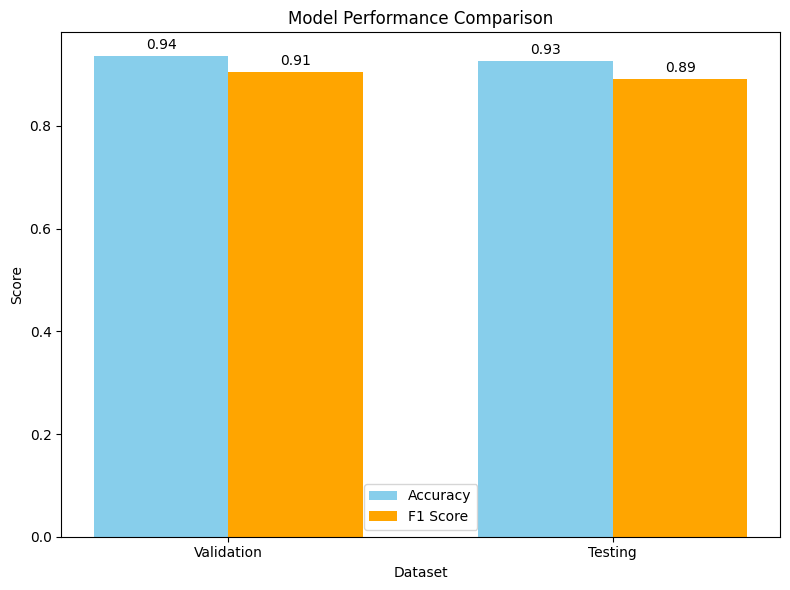

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Access the best-tuned model (replace "Random Forest" with the best model name if needed)
best_model = best_models["Random Forest"]["model"]

# Predictions for validation and test sets
y_pred_val = best_model.predict(X_val)
y_pred_test = best_model.predict(X_test)

# Metrics for Validation and Testing
metrics = {
    "Accuracy": [accuracy_score(y_val, y_pred_val), accuracy_score(y_test, y_pred_test)],
    "F1 Score": [f1_score(y_val, y_pred_val, average='weighted'), f1_score(y_test, y_pred_test, average='weighted')]
}

# Bar Chart
labels = ['Validation', 'Testing']
x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 6))
acc_bars = ax.bar(x - width/2, metrics['Accuracy'], width, label='Accuracy', color='skyblue')
f1_bars = ax.bar(x + width/2, metrics['F1 Score'], width, label='F1 Score', color='orange')

# Add labels and titles
ax.set_xlabel('Dataset')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels
for bars in [acc_bars, f1_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()
